In [91]:
#encoding=utf8
import csv
import matplotlib
from matplotlib import rc
matplotlib.use('svg')
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import imageio

In [92]:
def prepare_canvas(width=350.0, fontsize=12, fontsize_small=10, lw=0.5):
    """
    Prepares a figure with specified width <width> and height
    calculated according to the golden mean ratio.
    Arguments:
       - width : float specifying the width in points, or string holding a value and its unit separated by space.
                 Valid units are 'cm', 'pt', 'in'
    Example:
        prepare_canvas(width='7.2 cm')
    """
    try:
        width = width.split()
        width_value = float(width[0])
        width_units = width[1]
    except AttributeError:
        width_value = float(width)
        width_units = 'pt'  # assume points

    inches_per_pt = 1.0/72.27 # According to TeX
    inches_per_cm = 1.0/2.54  #
    if width_units == 'pt':
        fig_width = width_value * inches_per_pt
    elif width_units == 'cm':
        fig_width = width_value * inches_per_cm
    elif width_units == 'in':
        fig_width = width_value

    golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
    fig_height = 0.9*fig_width      # height in inches
    fig_size = [fig_width,fig_height]

    rc('figure', figsize=fig_size)
    rc('lines', linewidth=lw)
    rc('font', family='sans-serif', serif=['Latin Modern Roman','Palatino'], size=fontsize)
    rc('text', usetex=False)
    rc('legend', fontsize=fontsize)
    rc('axes', labelsize=fontsize)
    rc('xtick', labelsize=fontsize_small)
    rc('ytick', labelsize=fontsize_small)


def read_tsv(filename):
    tmp = []
    with open(filename,'rb') as f:
        reader = csv.reader(f, delimiter='\t')
        header = reader.next()  # skip header
        dataset = []
        for row in reader:
            age = int(row[0].split(' ')[0])
            sex = 'F' if row[1] == 'Females' else 'M'
            for i in range(2, len(row)):
                npersons = int(row[i])
                year = int(header[i])
                tmp.append({
                    'age': age,
                    'sex': sex,
                    'year': year,
                    'npersons': npersons
                })

    tmp = pd.DataFrame(tmp)
    return tmp

[Text(0, 0.5, 'Age-Group'),
 Text(0.5, 0, 'Population (hundreds of millions)'),
 Text(0.5, 1.0, 'Population Pyramid')]

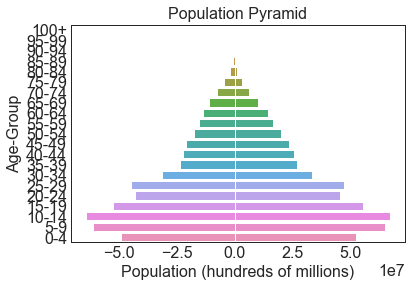

In [40]:
#df = pd.DataFrame({'Age': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'], 
                    'Male': [-49228000, -61283000, -64391000, -52437000, -42955000, -44667000, -31570000, -23887000, -22390000, -20971000, -17685000, -15450000, -13932000, -11020000, -7611000, -4653000, -1952000, -625000, -116000, -14000, -1000], 
                    'Female': [52367000, 64959000, 67161000, 55388000, 45448000, 47129000, 33436000, 26710000, 25627000, 23612000, 20075000, 16368000, 14220000, 10125000, 5984000, 3131000, 1151000, 312000, 49000, 4000, 0]})
#AgeGroup = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

#bar_plot = sns.barplot(x='Male', y='Age', data=df, order=AgeGroup)
#bar_plot = sns.barplot(x='Female', y='Age', data=df, order=AgeGroup)

#bar_plot.set(xlabel="Population (hundreds of millions)", ylabel="Age-Group", title = "Population Pyramid")# Read data


      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     SEX  abs_pop
0              1    0   9326410  China -8499084   CH  2010    Male  8499084
1              2    1   9326410  China -8518955   CH  2010    Male  8518955
2              3    2   9326410  China -8507974   CH  2010    Male  8507974
3              4    3   9326410  China -8429225   CH  2010    Male  8429225
4              5    4   9326410  China -8307210   CH  2010    Male  8307210
...          ...  ...       ...    ...      ...  ...   ...     ...      ...
4237        4238   96   9326410  China    32878   CH  2010  Female    32878
4238        4239   97   9326410  China    18763   CH  2010  Female    18763
4239        4240   98   9326410  China    11166   CH  2010  Female    11166
4240        4241   99   9326410  China     6547   CH  2010  Female     6547
4241        4242  100   9326410  China     8154   CH  2010  Female     8154

[202 rows x 9 columns]
      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     S

      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     SEX  abs_pop
909          910    0   9326410  China -8712042   CH  2019    Male  8712042
910          911    1   9326410  China -8832999   CH  2019    Male  8832999
911          912    2   9326410  China -8920559   CH  2019    Male  8920559
912          913    3   9326410  China -8968269   CH  2019    Male  8968269
913          914    4   9326410  China -8897951   CH  2019    Male  8897951
...          ...  ...       ...    ...      ...  ...   ...     ...      ...
5146        5147   96   9326410  China    61433   CH  2019  Female    61433
5147        5148   97   9326410  China    40614   CH  2019  Female    40614
5148        5149   98   9326410  China    25090   CH  2019  Female    25090
5149        5150   99   9326410  China    15489   CH  2019  Female    15489
5150        5151  100   9326410  China    17055   CH  2019  Female    17055

[202 rows x 9 columns]
      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     S

      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     SEX  abs_pop
1818        1819    0   9326410  China -6638036   CH  2028    Male  6638036
1819        1820    1   9326410  China -6829772   CH  2028    Male  6829772
1820        1821    2   9326410  China -7045891   CH  2028    Male  7045891
1821        1822    3   9326410  China -7286692   CH  2028    Male  7286692
1822        1823    4   9326410  China -7544975   CH  2028    Male  7544975
...          ...  ...       ...    ...      ...  ...   ...     ...      ...
6055        6056   96   9326410  China   121585   CH  2028  Female   121585
6056        6057   97   9326410  China    81279   CH  2028  Female    81279
6057        6058   98   9326410  China    55579   CH  2028  Female    55579
6058        6059   99   9326410  China    32713   CH  2028  Female    32713
6059        6060  100   9326410  China    44102   CH  2028  Female    44102

[202 rows x 9 columns]
      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     S

      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     SEX  abs_pop
2727        2728    0   9326410  China -5880226   CH  2037    Male  5880226
2728        2729    1   9326410  China -5885168   CH  2037    Male  5885168
2729        2730    2   9326410  China -5905712   CH  2037    Male  5905712
2730        2731    3   9326410  China -5940572   CH  2037    Male  5940572
2731        2732    4   9326410  China -5991698   CH  2037    Male  5991698
...          ...  ...       ...    ...      ...  ...   ...     ...      ...
6964        6965   96   9326410  China   234345   CH  2037  Female   234345
6965        6966   97   9326410  China   165127   CH  2037  Female   165127
6966        6967   98   9326410  China   111872   CH  2037  Female   111872
6967        6968   99   9326410  China    78515   CH  2037  Female    78515
6968        6969  100   9326410  China   126661   CH  2037  Female   126661

[202 rows x 9 columns]
      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     S

      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     SEX  abs_pop
3636        3637    0   9326410  China -5928819   CH  2046    Male  5928819
3637        3638    1   9326410  China -5942359   CH  2046    Male  5942359
3638        3639    2   9326410  China -5946583   CH  2046    Male  5946583
3639        3640    3   9326410  China -5941226   CH  2046    Male  5941226
3640        3641    4   9326410  China -5927624   CH  2046    Male  5927624
...          ...  ...       ...    ...      ...  ...   ...     ...      ...
7873        7874   96   9326410  China   597317   CH  2046  Female   597317
7874        7875   97   9326410  China   388648   CH  2046  Female   388648
7875        7876   98   9326410  China   275777   CH  2046  Female   275777
7876        7877   99   9326410  China   193458   CH  2046  Female   193458
7877        7878  100   9326410  China   326155   CH  2046  Female   326155

[202 rows x 9 columns]
      Unnamed: 0  AGE  AREA_KM2   NAME      POP FIPS  time     S

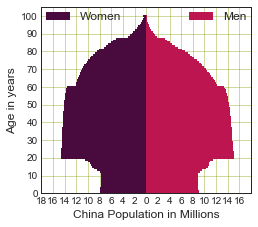

In [93]:
YEAR = 2010
for YEAR in range(2010,2021):
    df = pd.read_csv("C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\人口金字塔数据\\China.csv")
    df = df[df.time == YEAR]
    women = df[df.SEX == 'Female']
    men = df[df.SEX == 'Male']
    print(df)
    prepare_canvas(width = '10 cm')
    ax = plt.gca()
    ax.barh(women.AGE.values, -women.abs_pop.values, color='#490A3D', linewidth=0, height=1.2)
    ax.barh(men.AGE.values, men.abs_pop.values, color='#BD1550', linewidth=0, height=1.2)
    ax.set_ylabel(u'Age in years')
    ax.set_xlabel(u'China Population in Millions')
    plt.grid('on', linestyle='-', color='#8A9B0F', alpha=0.5)
    plt.legend(('Women', 'Men'), frameon=False, loc='upper left', ncol=2, mode='expand', borderaxespad=0.)
    plt.yticks(np.arange(0,105,10))
    plt.xlim(-18000000,18000000)
    plt.ylim(0,105)
    plt.xticks(np.arange(-18000000,18000000,2000000), np.abs(np.arange(-18,18,2)))
    plt.subplots_adjust(left=0.16)
    plt.subplots_adjust(bottom=0.15)
    plt.savefig("C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\ChinaPyramid{}.png".format(YEAR))
    

In [75]:
import imageio

In [98]:
def compose_gif():
    img_paths = ["C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2010.png",
                 "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2011.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2012.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2013.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2014.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2015.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2016.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2017.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2018.png",
                "C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\图片素材\\ChinaPyramid2019.png"]
    gif_images = []
    for path in img_paths:
        gif_images.append(imageio.imread(path))
    imageio.mimsave("C:\\Users\\admini\\Desktop\\硕士\\人口分析技术\\动态人口金字塔_Python\\ChinaPyramid_Python.gif",gif_images,fps=5)
compose_gif()